# Shelter Resident Deaths: Data Cleaning and Exploratory Analysis (2007-2025)

This notebook loads the `Deaths of Shelter Residents.json` dataset, performs necessary data cleaning (handling 'n/a' values and creating a time-series index), generates summary statistics, and visualizes the trends over time.

---
## 1. Setup and Initial Data Inspection

### Code Explanation
We import the required libraries (`pandas`, `numpy`, `matplotlib`, `seaborn`), set up the plotting styles, and attempt to load the data from the `Deaths of Shelter Residents.json` file. The code then prints the head of the DataFrame and its data types to inspect the initial structure and identify necessary cleaning steps (like the `object` dtype for `Transgender/Non-binary/Two-Spirit`).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration and Data Loading ---

# Set up plotting style for visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.family'] = 'sans-serif'

# 1. Data Loading
# Assuming the file "Deaths of Shelter Residents.json" is accessible in the environment
try:
    df = pd.read_json('../data/Deaths of Shelter Residents.json')
except FileNotFoundError:
    print("Error: 'Deaths of Shelter Residents.json' not found. Please ensure the file is in the correct directory.")
    exit()

print("--- 1. Initial Data Inspection ---")
print("\nInitial DataFrame Head:")
print(df.head())
print("\nInitial Data Types:")
df.info()

--- 1. Initial Data Inspection ---

Initial DataFrame Head:
   _id  Year Month  Total decedents  Male  Female  \
0    1  2007   Jan                0     0       0   
1    2  2007   Feb                3     3       0   
2    3  2007   Mar                3     2       1   
3    4  2007   Apr                1     1       0   
4    5  2007   May                2     2       0   

  Transgender/Non-binary/Two-Spirit  
0                               n/a  
1                               n/a  
2                               n/a  
3                               n/a  
4                               n/a  

Initial Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   _id                                225 non-null    int64 
 1   Year                               225 non-null    int64 
 2   Month      

---
## 2. Data Cleaning and Preprocessing

### Code Explanation
This section cleans the data for analysis:

1.  **Rename Column:** The lengthy `Transgender/Non-binary/Two-Spirit` column is renamed to `TGNBT` for brevity.
2.  **Handle Missing Data and Type Conversion:** Non-numeric string values (`'n/a'`) in the `TGNBT` column are replaced with `0`, and the column is converted to an `integer` data type.
3.  **Create Time-Series Index:** The `Year` and `Month` columns are combined to form a datetime index (`Date`), which is essential for time-series plotting.
4.  **Drop Columns:** Unnecessary columns (`_id`, `Year`, `Month`) are removed.

In [3]:
# Rename the long column for easier use
df = df.rename(columns={'Transgender/Non-binary/Two-Spirit': 'TGNBT'})

# Handle 'n/a' in the 'TGNBT' column by replacing it with 0 
# Then convert the column to integer type for numerical analysis
df['TGNBT'] = df['TGNBT'].replace('n/a', '0').astype(int)

# Create a combined datetime index for time-series analysis
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%b')
df = df.set_index('Date').sort_index()

# Drop unnecessary columns
df = df.drop(columns=['_id', 'Year', 'Month'])

print("\n\n--- 2. Cleaned Data Verification ---")
print("\nCleaned DataFrame Head (showing time-series index and TGNBT as int):")
print(df.head())
print("\nFinal Data Types:")
df.info()



--- 2. Cleaned Data Verification ---

Cleaned DataFrame Head (showing time-series index and TGNBT as int):
            Total decedents  Male  Female  TGNBT
Date                                            
2007-01-01                0     0       0      0
2007-02-01                3     3       0      0
2007-03-01                3     2       1      0
2007-04-01                1     1       0      0
2007-05-01                2     2       0      0

Final Data Types:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225 entries, 2007-01-01 to 2025-09-01
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Total decedents  225 non-null    int64
 1   Male             225 non-null    int64
 2   Female           225 non-null    int64
 3   TGNBT            225 non-null    int64
dtypes: int64(4)
memory usage: 8.8 KB


---
## 3. Exploratory Data Analysis (EDA): Summary Statistics

### Code Explanation
We use the `.describe()` method on the core count columns (`Total decedents`, `Male`, `Female`, `TGNBT`) to quickly understand the central tendency, dispersion, and range of the data. The output immediately highlights the significant difference in average counts between male and female decedents.

In [4]:
# Summary Statistics
print("\n\n--- 3. Summary Statistics (Monthly Decedents 2007-2025) ---")
summary_stats = df[['Total decedents', 'Male', 'Female', 'TGNBT']].describe().T
print(summary_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']].round(2))



--- 3. Summary Statistics (Monthly Decedents 2007-2025) ---
                 count  mean   std  min  25%  50%  75%   max
Total decedents  225.0  3.85  3.51  0.0  1.0  3.0  6.0  19.0
Male             225.0  2.99  2.76  0.0  1.0  2.0  4.0  16.0
Female           225.0  0.81  1.14  0.0  0.0  0.0  1.0   5.0
TGNBT            225.0  0.06  0.25  0.0  0.0  0.0  0.0   2.0


---
## 4. EDA: Time-Series Visualizations

### Code Explanation
These plots visualize the data's evolution over time, using the `Date` index created earlier.

**Plot 1 (Total Decedents):** Shows the overall monthly trend. A vertical dashed line is added at January 1, 2020, to highlight the approximate start of a significant increase in total deaths.

**Plot 2 (Decedents by Gender):** Separates the counts by gender category to show which group is primarily driving the overall trend. The conditional plotting of the `TGNBT` category ensures the code is robust, though this data only becomes non-zero after 2020.

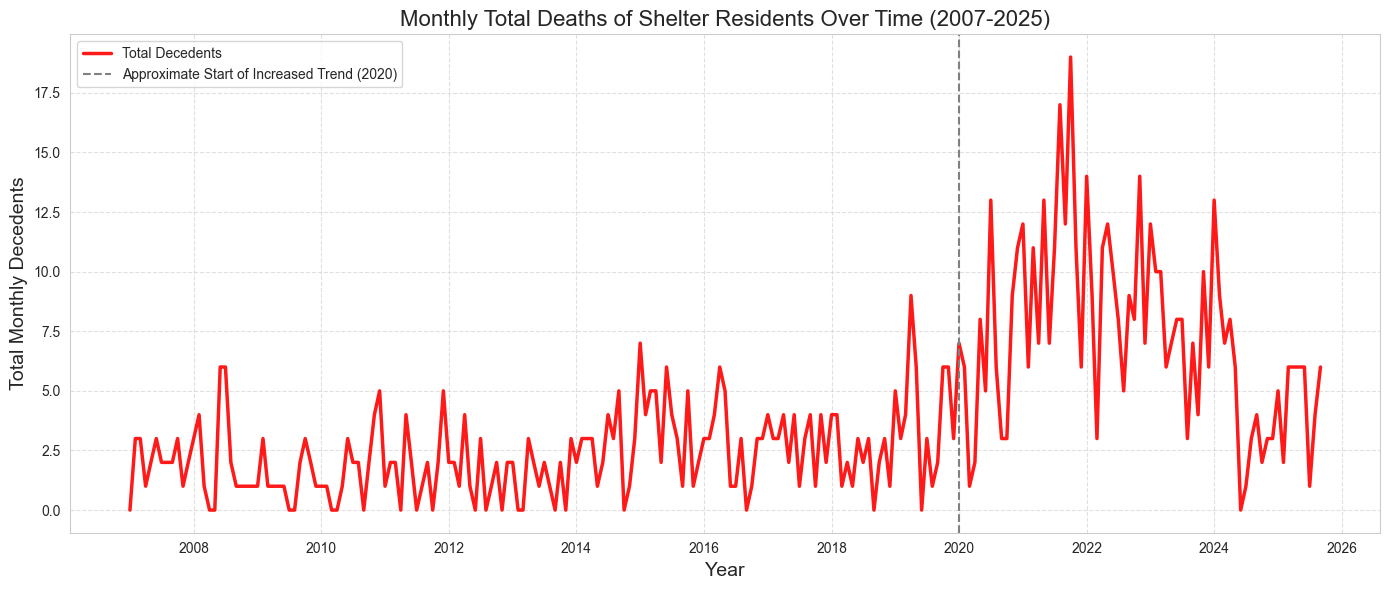

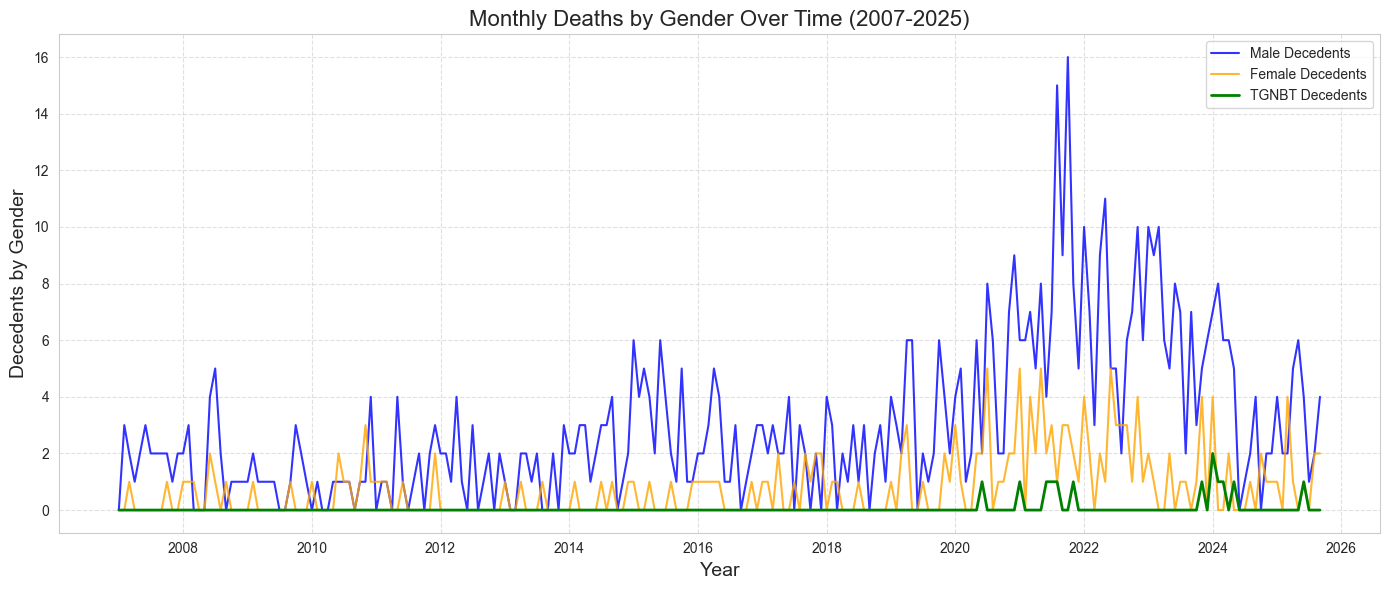

In [5]:
# Plot 1: Total Decedents Over Time
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Total decedents'], label='Total Decedents', color='red', linewidth=2.5, alpha=0.9)
plt.title('Monthly Total Deaths of Shelter Residents Over Time (2007-2025)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Monthly Decedents', fontsize=14)
# Highlight the significant jump around 2020
plt.axvline(pd.to_datetime('2020-01-01'), color='gray', linestyle='--', label='Approximate Start of Increased Trend (2020)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot 2: Decedents by Gender Over Time
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Male'], label='Male Decedents', color='blue', alpha=0.8)
plt.plot(df.index, df['Female'], label='Female Decedents', color='orange', alpha=0.8)
# Only plot TGNBT if there are non-zero values recorded (which starts around 2020)
if df['TGNBT'].sum() > 0:
    plt.plot(df.index, df['TGNBT'], label='TGNBT Decedents', color='green', linewidth=2, alpha=1.0)
    
plt.title('Monthly Deaths by Gender Over Time (2007-2025)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Decedents by Gender', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

---
## 5. EDA: Distribution Analysis (Histograms and Bar Plots)

### Code Explanation
These subplots illustrate the frequency distribution of monthly death counts for each category over the entire period.

* **Histograms (A and B):** Used for Total and Male decedents to show the general shape of the distribution, which is heavily skewed right (low counts are most common).
* **Count Plots (C and D):** Used for Female and TGNBT, as their counts are often $0$, making a bar plot (showing the frequency of each discrete count) more informative.

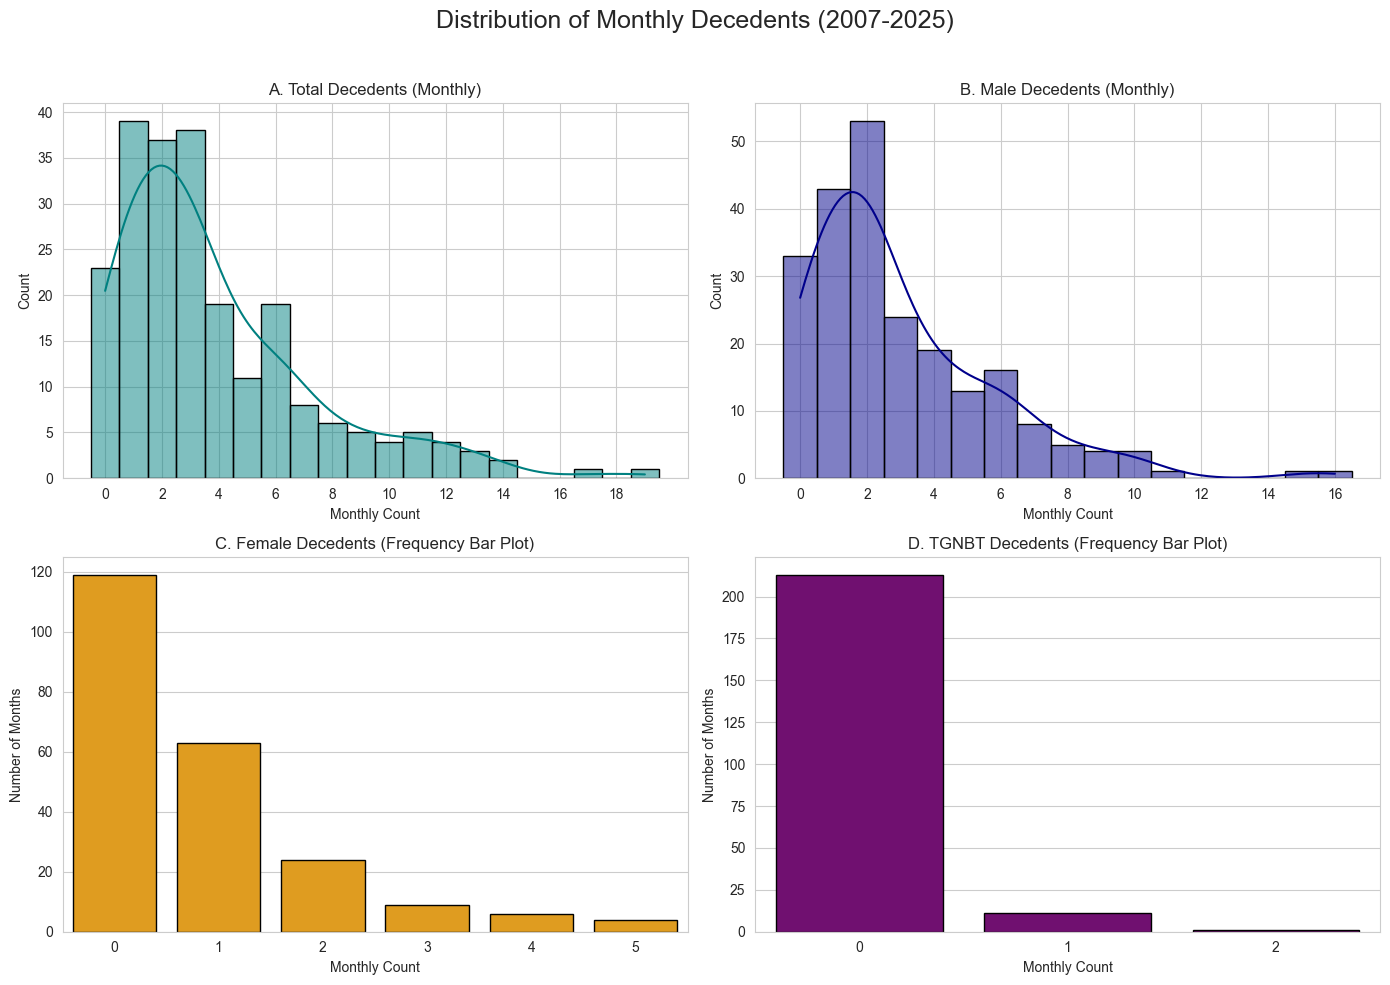

In [6]:
# Distribution analysis (using subplots)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Monthly Decedents (2007-2025)', fontsize=18)

# A. Total Decedents (Histogram)
# np.arange(x+2) - 0.5 ensures that bars are centered correctly over integer counts
sns.histplot(df['Total decedents'], bins=np.arange(df['Total decedents'].max() + 2) - 0.5,
             kde=True, ax=axes[0, 0], color='teal', edgecolor='black')
axes[0, 0].set_title('A. Total Decedents (Monthly)')
axes[0, 0].set_xlabel('Monthly Count')
axes[0, 0].set_xticks(np.arange(0, df['Total decedents'].max() + 1, 2))

# B. Male Decedents (Histogram)
sns.histplot(df['Male'], bins=np.arange(df['Male'].max() + 2) - 0.5,
             kde=True, ax=axes[0, 1], color='darkblue', edgecolor='black')
axes[0, 1].set_title('B. Male Decedents (Monthly)')
axes[0, 1].set_xlabel('Monthly Count')
axes[0, 1].set_xticks(np.arange(0, df['Male'].max() + 1, 2))

# C. Female Decedents (Bar Plot)
sns.countplot(x=df['Female'], ax=axes[1, 0], color='orange', edgecolor='black')
axes[1, 0].set_title('C. Female Decedents (Frequency Bar Plot)')
axes[1, 0].set_xlabel('Monthly Count')
axes[1, 0].set_ylabel('Number of Months')

# D. TGNBT Decedents (Bar Plot)
sns.countplot(x=df['TGNBT'], ax=axes[1, 1], color='purple', edgecolor='black')
axes[1, 1].set_title('D. TGNBT Decedents (Frequency Bar Plot)')
axes[1, 1].set_xlabel('Monthly Count')
axes[1, 1].set_ylabel('Number of Months')
axes[1, 1].set_xticks(np.arange(df['TGNBT'].max() + 1))

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


--- Average Monthly Deaths (Across All Years 2007-2025) ---
     Total decedents  Male  Female  TGNBT
Jan             5.16  3.58    1.42   0.16
Feb             4.05  3.42    0.58   0.05
Mar             3.47  2.63    0.79   0.05
Apr             4.11  3.32    0.79   0.00
May             4.21  3.58    0.58   0.05
Jun             3.58  2.63    0.79   0.16
Jul             3.79  2.79    0.95   0.05
Aug             3.26  2.63    0.58   0.05
Sep             3.21  2.47    0.74   0.00
Oct             3.56  2.94    0.61   0.00
Nov             4.17  2.89    1.17   0.11
Dec             3.67  2.94    0.72   0.00


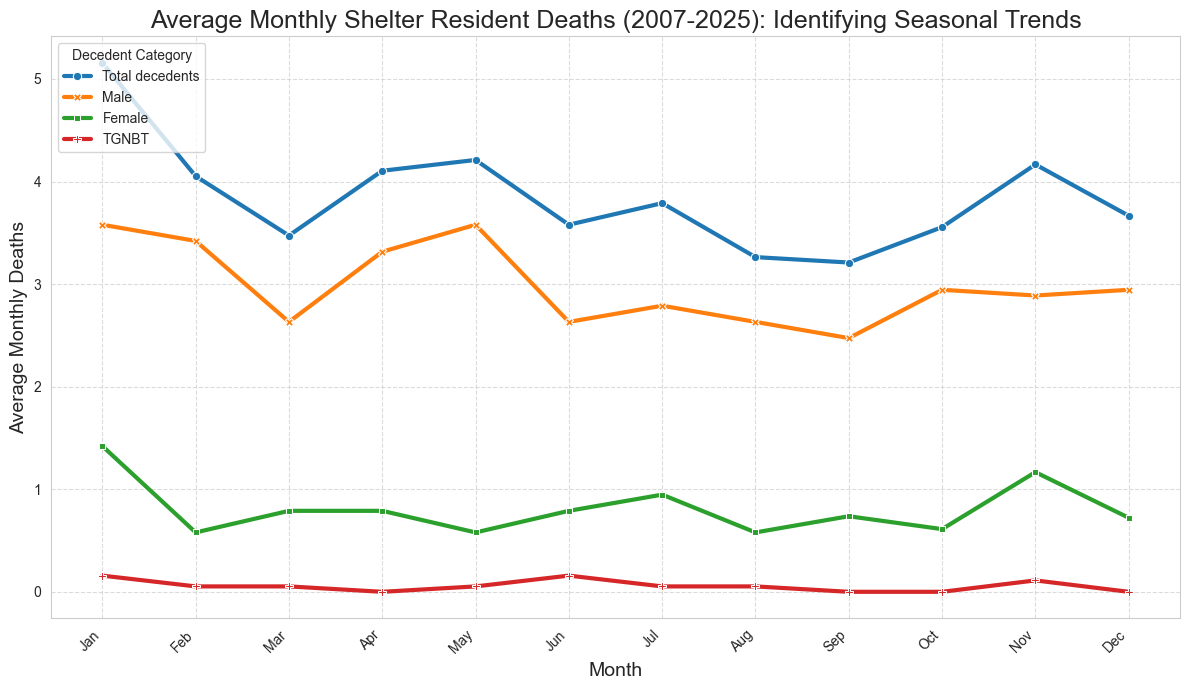

In [8]:
monthly_avg_deaths = df.groupby(df.index.month)[['Total decedents', 'Male', 'Female', 'TGNBT']].mean()

# Rename the index from numbers (1, 2, ...) to month names for clear visualization
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_avg_deaths.index = month_names

print("\n--- Average Monthly Deaths (Across All Years 2007-2025) ---")
print(monthly_avg_deaths.round(2))

plt.figure(figsize=(12, 7))

# Create a line plot for all averages
sns.lineplot(data=monthly_avg_deaths, linewidth=3, markers=True, dashes=False)

plt.title('Average Monthly Shelter Resident Deaths (2007-2025): Identifying Seasonal Trends', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Monthly Deaths', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Decedent Category', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()